In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\Breast-Cancer-Detection-master\data.csv"
data = pd.read_csv(file_path)

# Select a feature column and the target column (diagnosis)
# Assuming 'diagnosis' is the target column and 'area_mean' is one of the features
X = data[['area_mean']]  # Feature column
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Mapping diagnosis to numeric values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Predict on training data
y_train_pred = reg.predict(X_train)

print("Model trained successfully.")


Model trained successfully.


In [12]:
# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = reg.predict(X_test)

# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")


Training MSE: 0.12064237040188494, RMSE: 0.34733610581378516, MAPE: 555788762863164.5, R2: 0.48326257432759057
Test MSE: 0.0992450242543682, RMSE: 0.31503178292732337, MAPE: 525491887389714.5, R2: 0.5775341188307339


In [22]:
# Use all columns except 'diagnosis' as features
X = data.drop(columns=['diagnosis', 'Unnamed: 32'])  # Drop target and any unnecessary columns
y = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Predict on training data
y_train_pred = reg.predict(X_train)

# Predict on test data
y_test_pred = reg.predict(X_test)

# Reuse the code from A2 to calculate metrics
# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = reg.predict(X_test)

# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")



Training MSE: 0.051580781492114876, RMSE: 0.2271140275106645, MAPE: 417509529517666.3, R2: 0.7790683310215358
Test MSE: 0.06402707095911243, RMSE: 0.25303571083764526, MAPE: 452209325576615.9, R2: 0.7274497824485341


In [4]:
from sklearn.cluster import KMeans

# Use all columns except 'diagnosis' for clustering
X = data.drop(columns=['diagnosis', 'Unnamed: 32'])

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("K-means clustering completed.")
print("Cluster centers:", centers)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load your dataset and preprocess it (assuming the data is already loaded)
X = data.drop(columns=['diagnosis', 'Unnamed: 32'])  # Exclude the target and unnecessary columns

# Train the k-means model with 2 clusters (for example)
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X)

# Calculate the Silhouette Score, CH Score, and DB Index
sil_score = silhouette_score(X, kmeans.labels_)
ch_score = calinski_harabasz_score(X, kmeans.labels_)
db_score = davies_bouldin_score(X, kmeans.labels_)

# Print the results
print(f"Silhouette Score: {sil_score}")
print(f"CH Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")


Silhouette Score: 0.9753276628229737
CH Score: 10344.154673193765
Davies-Bouldin Index: 0.038293779040724646


In [18]:
import pandas as pd

# Define a dictionary to store the scores for different k values
scores = {'k': [], 'silhouette': [], 'ch_score': [], 'db_score': []}

for k in range(2, 11):  # Adjust range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    labels = kmeans.labels_

    # Store the scores for each k
    scores['k'].append(k)
    scores['silhouette'].append(silhouette_score(X, labels))
    scores['ch_score'].append(calinski_harabasz_score(X, labels))
    scores['db_score'].append(davies_bouldin_score(X, labels))

# Convert the scores to a DataFrame for easier viewing and plotting
scores_df = pd.DataFrame(scores)
print(scores_df)


    k  silhouette      ch_score  db_score
0   2    0.975328  1.034415e+04  0.038294
1   3    0.966819  2.912509e+05  0.042527
2   4    0.963715  2.803553e+05  0.169273
3   5    0.973463  1.908270e+06  0.134187
4   6    0.928782  2.534904e+06  0.280867
5   7    0.930313  3.401974e+06  0.237410
6   8    0.932266  4.974011e+06  0.141144
7   9    0.937692  9.717063e+06  0.151160
8  10    0.930086  1.375457e+07  0.139392


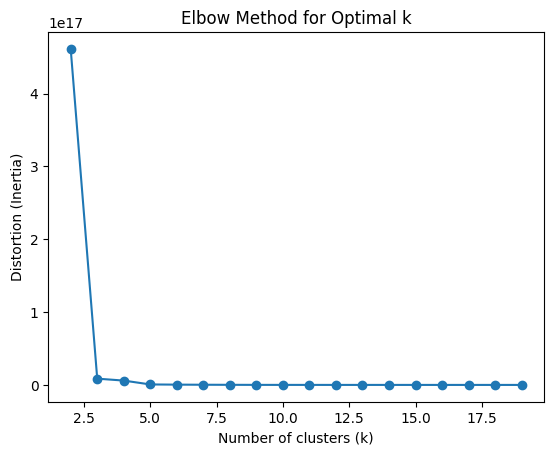

In [19]:
import matplotlib.pyplot as plt

# Calculate distortions (inertia) for different values of k
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()
